# Step 1 - Run this cell first (package management)

Select the cell and press Ctrl+Enter

In [4]:
# Package management
from numpy import *
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root

# Step 2 - Define parameters and initial conditions

This is the part of the code where we define the variables that will go into the differential equation.

In [5]:
# g is the acceleration due to gravity
g = 9.8

# B is an air resistance coefficient
B = 1.96

# x0 is the initial position of the object
x0 = 0.

# v0 is the initial velocity of the object
v0 = 0.

# The solve_ivp function only solves the differential equation over a certain time interval, and only returns the position at certain points in time
# -- tfinal -- is the end of the time interval we are solving for
tfinal = 4.

# Step 3 - Define the differential equation

We first need to define which differential equation we are solving. We do this by defining a particular python function. The function takes in the current time and the current values of position and velocity and returns dx/dt and dv/dt. It can also take in other parameters, like mass or g, etc.

Besides the parameters, you should only ever need to change the line
dvdt = ...
That's the line that determines the differential equation. Newton's 2nd Law tells you what to put there. You can use math operations on the variables x and v to construct the right equation.

In [6]:
def ode(t,vars,g,B):
	x = vars[0]
	v = vars[1]
	
	# Always have to have dxdt = v
	dxdt = v
	
	# MODIFY THIS LINE
	# This is where we calculate the acceleration given the position and velocity using Newton's 2nd law
	dvdt = -g - B*v
	
	return([dxdt,dvdt])

# Step 4 - Solve the differential equation

In [7]:
# solve_ivp is the function that actually solves the differential equation. We have to give it a bunch of information
# "ode" is the ode function we defined earlier in the code
# "(0,tfinal)" is the time range we are interested in
# "[x0,v0]" is telling the function the initial conditions
# "args = (g,B)" is telling the function the extra parameters that need to get passed on to the ode function.
# "dense_output = True" is telling the function that we want it to give us a function that we can plug time into and get position and velocity back.
#		(Otherwise it just returns the position and velocity at a few specific times)

odesolution = solve_ivp(ode,(0,tfinal),[x0,v0], args = (g, B), dense_output=True)
xfunc = lambda t: odesolution.sol(t)[0]
vfunc = lambda t: odesolution.sol(t)[1]

# "odesolution" is now a variable that we can get information out of.
# "odesolution.sol" is a function that we can plug a time into to get the position and velocity. E.g. "odesolution(3.)" might return [1.5, 2.6]
# xfunc is a function that takes a time and returns the position -- If I want to know the position
#        at t = 2.3 I would use "xfunc(2.3)"
# vfunc is a function that takes a time and returns the velocity -- vfunc(1.2) is the velocity at t=1.2


# Plotting the solution

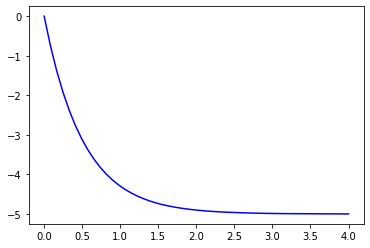

In [9]:
###
# Plot the results
###

# Pick some specific times to look at
Nt = 50
tpoints = linspace(0,tfinal,Nt)

#Calculate the position and velocity at those points
[xpoints,vpoints] = odesolution.sol(tpoints)

fig = plt.figure()
# Plot v versus t. (The plt.plot function takes the x data first then the y data. Don't ask me why
# The part "'b-'" tells the plot function to make a blue line.
plt.plot(tpoints,vpoints,'b-')

# Plot x versus t for an object without air resistance
# plt.plot(t,v0-g*t,'r-')

# Show the plot
plt.show()


# Save the figure
# plt.savefig("filename.png",bbox_inches='tight',dpi=600)

# Solving with the solution 

Often we want to take our solution and use it to solve for a specific time. To do this we will use the "root" function. But first we have to define what equation we are trying to solve. We do this by defining a python function that returns a function that is zero at the time that we want. 

For example, if we want to find the time when the position is 3.0 m we would define a function that returns x(t)-3.
If we want to find the time that the velocity is 98% of the terminal velocity we would define a function that returns v(t) - 0.98* vT

In [10]:
# Root function for solving
# This one solves for the time when the object reaches a certain position, x=-5 m
def solvedist(t):
    return xfunc(t) - (-5.)

In [11]:
# Use the root function to solve for the time
# "solvedist" is the equation function we defined above
# "3." is our initial guess for the time. If there's only one possible solution it doesn't matter very much
#            what your guess is.
# "rootsol" is a variable that has the solution and information about whether it's a good solution or not.
rootsol = root(solvedist,3.)
tsol = rootsol.x

if rootsol.success:
    print(tsol)
    
    # If we really found the correct time then this line should print "-5"
    print(xfunc(tsol))
else:
    print("No solution found.")

[1.48234658]
[-5.]
